In [1]:
import os
import json
from pyxyz import Confpool, KC2H, MolProxy
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

import typing
from tqdm import tqdm

In [2]:
def chebyshev_dist(
    mol_1 : MolProxy,
    mol_2 : MolProxy,
    simple_reorder : typing.List[int]
) -> float:
    
    new_mol_1 = mol_1.aligned_with(mol_2)
    
    nonhydrogen_atoms = np.array(simple_reorder)
    difference_matr = (new_mol_1 - mol_2.xyz)[nonhydrogen_atoms]
    row_norms = np.linalg.norm(difference_matr, axis=1)
    
    return float(np.max(row_norms))

In [3]:
crest_lowest_en = {}

for filename in os.listdir('crest_res/'):
    idx = int(filename.split('_')[1])
    
    crest_ens = Confpool()
    crest_ens.include_from_file(f'crest_res/mol_{idx}/crest_conformers_no_h.xyz')
    crest_ens["Energy"] = lambda m: float(m.descr.strip())

    crest_lowest_en[idx] = min(crest_ens, key=lambda x: x['Energy'])['Energy']

In [4]:
chebyshev_distr = {}
min_max_chebyshev_distr = {}

rmsd_distr = {}
min_max_rmsd_distr = {}

for filename in os.listdir('crest_res/'):

    idx = int(filename.split('_')[1])

    print(f"Mol: {idx}")
    
    crest_ens = Confpool()
    crest_ens.include_from_file(f'crest_res/mol_{idx}/crest_conformers_no_h.xyz')
    crest_ens["Energy"] = lambda m: float(m.descr.strip())

    crest_ens_size = len(crest_ens)
    
    aug_ens = Confpool()
    aug_ens.include_from_file(f'aug_res/bocs_mol_{idx}_iv_pi_refine_final_ensemble_filtered_no_h.xyz')

    aug_ens["Energy"] = lambda m: float(m.descr.split()[-1])
    aug_ens.filter(lambda x: x['Energy'] < crest_lowest_en[int(idx)] + (2 * KC2H), inplace=True)
        
    crest_ens.include_subset(aug_ens, range(len(aug_ens)))

    crest_ens.generate_connectivity(0, mult=1.3, ignore_elements=['HCarbon'], sdf_name='connectivity_check.sdf')
    crest_ens.generate_isomorphisms()
        
    cur_distr = []
    min_max_distr = []
    for i in tqdm(range(len(aug_ens))):
        tmp_distr = []
        for j in range(crest_ens_size):
            tmp_distr.append(
                chebyshev_dist(crest_ens[j], crest_ens[crest_ens_size + i], crest_ens.simple_reorder)
            )
        cur_distr.append(tmp_distr)
        min_max_distr.append(min(tmp_distr))
    chebyshev_distr[idx] = cur_distr
    min_max_chebyshev_distr[idx] = max(min_max_distr)

    cur_distr = []
    min_max_distr = []
    for i in tqdm(range(len(aug_ens))):
        tmp_distr = []
        for j in range(crest_ens_size):
            tmp_distr.append(
                crest_ens[j].rmsd(crest_ens[crest_ens_size + i])[0]
            )
        cur_distr.append(tmp_distr)
        min_max_distr.append(min(tmp_distr))
        
    rmsd_distr[idx] = cur_distr
    min_max_rmsd_distr[idx] = max(min_max_distr)

Mol: 0


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████| 26/26 [00:00<00:00, 2028.31it/s]


Mol: 1


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████| 12/12 [00:00<00:00, 16299.11it/s]

Mol: 16



100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00, 194.73it/s]


Mol: 17


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00, 65.46it/s]


Mol: 18


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 38/38 [00:01<00:00, 24.27it/s]


Mol: 2


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 2647.08it/s]


Mol: 21


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 731.40it/s]


Mol: 23


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████| 62/62 [00:00<00:00, 3276.22it/s]


Mol: 24


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00, 85.03it/s]


Mol: 25


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:01<00:00,  9.76it/s]


Mol: 26


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 234.16it/s]


Mol: 28


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████| 65/65 [00:00<00:00, 5639.60it/s]


Mol: 30


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████| 17/17 [00:00<00:00, 460.87it/s]


Mol: 31


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████| 43/43 [00:00<00:00, 123.24it/s]


Mol: 32


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████| 61/61 [00:00<00:00, 971.48it/s]


Mol: 34


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00, 2499.09it/s]


Mol: 35


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████| 26/26 [00:00<00:00, 925.45it/s]


Mol: 38


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████| 33/33 [00:00<00:00, 4397.80it/s]


Mol: 40


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 15307.68it/s]


Mol: 42


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 195.06it/s]


Mol: 43


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:00<00:00, 12545.28it/s]


Mol: 45


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████| 19/19 [00:00<00:00, 11183.24it/s]


Mol: 47


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████| 17/17 [00:00<00:00, 12712.28it/s]


Mol: 48


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████| 27/27 [00:00<00:00, 6262.58it/s]


Mol: 49


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00, 254.12it/s]


Mol: 50


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████| 31/31 [00:00<00:00, 465.48it/s]


Mol: 51


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████| 15/15 [00:00<00:00, 9469.38it/s]


Mol: 55


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████| 14/14 [00:00<00:00, 198.54it/s]


Mol: 56


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00, 231.62it/s]


Mol: 57


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00, 988.56it/s]


Mol: 58


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████| 11/11 [00:00<00:00, 170.34it/s]


Mol: 59


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 30/30 [00:01<00:00, 27.40it/s]


Mol: 6


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████| 49/49 [00:00<00:00, 129.30it/s]


Mol: 60


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00, 229.90it/s]


Mol: 64


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 42/42 [00:00<00:00, 98.31it/s]


Mol: 65


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 12/12 [00:00<00:00, 15.96it/s]


Mol: 66


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 13746.18it/s]


Mol: 67


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 98.37it/s]


Mol: 69


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 28.67it/s]


Mol: 70


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████| 27/27 [00:00<00:00, 2743.97it/s]


Mol: 71


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:00<00:00, 18575.31it/s]


Mol: 72


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████| 42/42 [00:00<00:00, 12862.21it/s]


Mol: 74


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00, 156.18it/s]


Mol: 76


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████| 34/34 [00:00<00:00, 1699.31it/s]


Mol: 77


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00, 43.87it/s]


Mol: 79


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████| 23/23 [00:00<00:00, 1000.31it/s]


Mol: 8


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 217.70it/s]


Mol: 80


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████| 47/47 [00:00<00:00, 172.17it/s]


Mol: 81


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 565.74it/s]


Mol: 82


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:00<00:00, 2359.00it/s]


Mol: 85


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00, 83.39it/s]


Mol: 86


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████| 18/18 [00:00<00:00, 16509.40it/s]


Mol: 87


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00, 887.78it/s]


Mol: 88


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████| 13/13 [00:00<00:00, 3838.77it/s]


Mol: 9


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████| 61/61 [00:00<00:00, 187.43it/s]


Mol: 90


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████| 11/11 [00:00<00:00, 775.64it/s]


Mol: 92


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████| 31/31 [00:00<00:00, 288.79it/s]


Mol: 93


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████| 25/25 [00:00<00:00, 14124.14it/s]


Mol: 94


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 1727.47it/s]


Mol: 95


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████| 92/92 [00:00<00:00, 1873.18it/s]


In [5]:
import matplotlib
matplotlib.rcParams.update({'font.size': 12})

Text(0, 0.5, 'Number of occurrences')

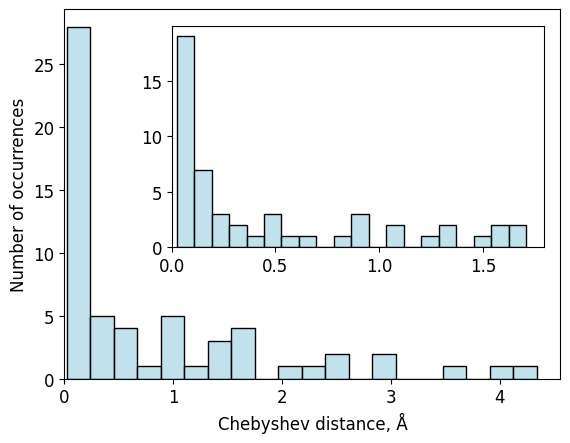

In [6]:
lm = sns.histplot(
    [cur for cur in min_max_chebyshev_distr.values()],
    bins=20,
    color='lightblue'
)
subplot = inset_axes(
    parent_axes=lm.axes,
    width="75%",
    height="60%",
    borderpad=1 
)
sns.histplot(
    [cur for cur in min_max_chebyshev_distr.values() if cur < 2],
    bins=20,
    color='lightblue',
    ax=subplot
)
subplot.set_xlim(0)
subplot.set_ylabel('')
lm.axes.set_xlim(0)
lm.axes.set_xlabel('Chebyshev distance, Å')
lm.axes.set_ylabel('Number of occurrences')

Text(0, 0.5, 'Number of occurrences')

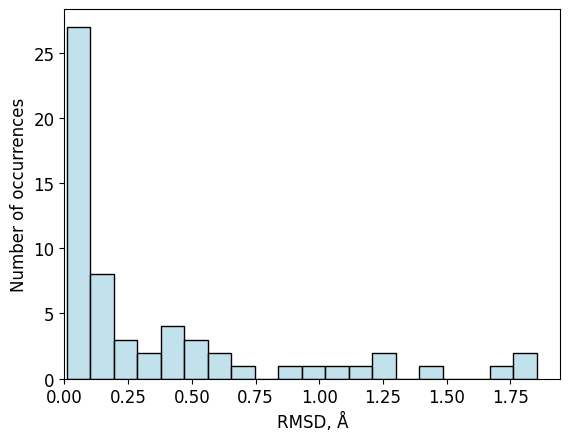

In [7]:
sns.histplot(
    [cur for cur in min_max_rmsd_distr.values()],
    bins=20,
    color='lightblue'
)
plt.xlim(0)
plt.xlabel('RMSD, Å')
plt.ylabel('Number of occurrences')

In [8]:
number_of_missed_cheb = {
    key : len([cur for cur in map(min, chebyshev_distr[key]) if cur > 0.55])
    for key in chebyshev_distr
}
number_of_missed_rmsd = {
    key : len([cur for cur in map(min, rmsd_distr[key]) if cur > 0.3])
    for key in rmsd_distr
}

In [9]:
en_logs = json.load(open('aug_res/augmentation_minima_en_logs.json', 'r'))
en_logs = {int(k) : v for k, v in en_logs.items()}

In [10]:
step_of_occurrence_cheb = {}
step_of_occurrence_rmsd = {}

for key in min_max_chebyshev_distr.keys():
    
    p = Confpool()
    p.include_from_file(f'aug_res/bocs_mol_{key}_iv_pi_refine_final_ensemble_filtered_no_h.xyz')
    p['Energy'] = lambda x: float(x.descr.split()[-1])

    if number_of_missed_cheb[key] == 0:
        continue
    
    min_dists = list(map(min, chebyshev_distr[key]))
    new_conformations_idxs = [cur for cur in range(len(min_dists)) if min_dists[cur] > 0.55]
    
    assert len(new_conformations_idxs) == number_of_missed_cheb[key]

    target_energies = [p[idx]['Energy'] for idx in new_conformations_idxs]
    
    steps = [
        np.argmin(np.abs(np.asarray(en_logs[key]) - target_energy)).item()
        for target_energy in target_energies
    ]

    step_of_occurrence_cheb[key] = min(steps)

    if number_of_missed_rmsd[key] == 0:
        continue
    
    min_dists = list(map(min, rmsd_distr[key]))
    new_conformations_idxs = [cur for cur in range(len(min_dists)) if min_dists[cur] > 0.3]

    assert len(new_conformations_idxs) == number_of_missed_rmsd[key], (len(new_conformations_idxs), key)
    
    target_energies = [p[idx]['Energy'] for idx in new_conformations_idxs]
    steps = [
        np.argmin(np.abs(np.asarray(en_logs[key]) - target_energy)).item()
        for target_energy in target_energies
    ]

    step_of_occurrence_rmsd[key] = min(steps)

(0.0, 100.0)

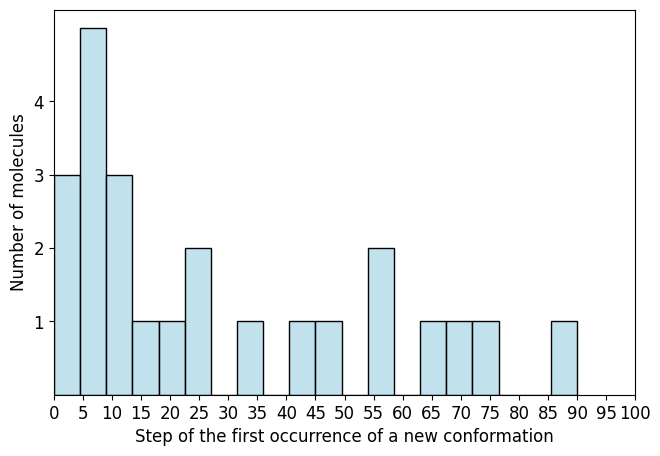

In [11]:
plt.figure(figsize=(7.5, 5))
sns.histplot(
    [cur for cur in step_of_occurrence_cheb.values()],
    bins=20,
    color='lightblue'
)

plt.xlabel('Step of the first occurrence of a new conformation')
plt.ylabel('Number of molecules')

plt.yticks([1, 2, 3, 4])
plt.xticks(range(0, 101, 5))
plt.xlim(0, 100)

(0.0, 100.0)

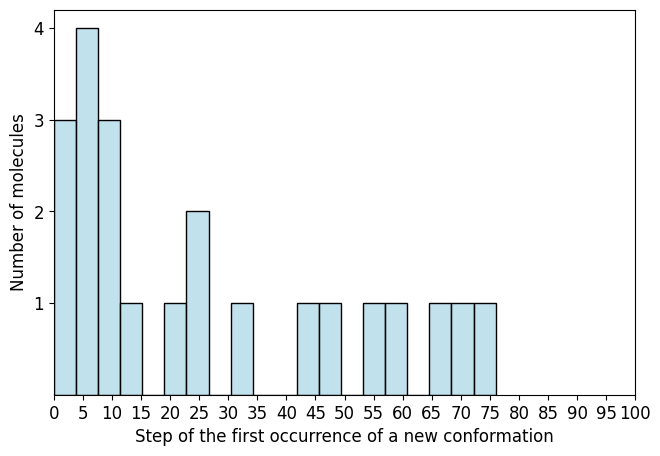

In [12]:
plt.figure(figsize=(7.5, 5))
sns.histplot(
    [cur for cur in step_of_occurrence_rmsd.values()],
    bins=20,
    color='lightblue'
)

plt.xlabel('Step of the first occurrence of a new conformation')
plt.ylabel('Number of molecules')

plt.yticks([1, 2, 3, 4])
plt.xticks(range(0, 101, 5))
plt.xlim(0, 100)

In [13]:
steps_to_keep = {}

for idx, number_of_occ in number_of_missed_cheb.items():
    
    steps_to_keep[idx] = []

    if number_of_occ == 0:
        continue
    
    if number_of_occ == 1:
        steps_to_keep[idx].append(None)
        continue
    
    crest_ens = Confpool()
    crest_ens.include_from_file(f'crest_res/mol_{idx}/crest_conformers_no_h.xyz')
    crest_ens["Energy"] = lambda m: float(m.descr.strip())

    crest_en = min(crest_ens, key=lambda x: x['Energy'])

    crest_ens_size = len(crest_ens)
    
    refine_ens = Confpool()
    refine_ens.include_from_file(f'aug_res/mol_{idx}_refine_all_points_no_h.xyz')    

    refine_ens["Energy"] = lambda m: float(m.descr.split()[-1])
    refine_ens.filter(lambda x: x['Energy'] < crest_lowest_en[idx] + (2 * KC2H), inplace=True)
    missed_idxs = [tmp_idx for tmp_idx, cur in enumerate(map(min, chebyshev_distr[idx])) if cur > 0.55]
    
    filtered_ens = Confpool()
    filtered_ens.include_subset(refine_ens, missed_idxs)
    filtered_ens.generate_connectivity(0, mult=1.3, ignore_elements=['HCarbon'], sdf_name='connectivity_check.sdf')
    filtered_ens.generate_isomorphisms()

    steps_to_keep[idx] = []
    collected_idxs = []

    for step, cur_en in enumerate(en_logs[idx]):
        for i in range(len(filtered_ens)):            
            if np.abs(cur_en - filtered_ens[i]['Energy']) < 1e-10:
                have_seen = False
                for j in collected_idxs:
                    if chebyshev_dist(filtered_ens[i], filtered_ens[j], simple_reorder=filtered_ens.simple_reorder) <= 0.55:
                        have_seen = True
                        break
                if have_seen:
                    continue
                steps_to_keep[idx].append(step)
                collected_idxs.append(i)
                break

In [14]:
chebyshev_distr_all = {}

for filename in os.listdir('crest_res/'):

    idx = int(filename.split('_')[1])

    print(f"Mol: {idx}")
    
    crest_ens = Confpool()
    crest_ens.include_from_file(f'crest_res/mol_{idx}/crest_conformers_no_h.xyz')
    crest_ens["Energy"] = lambda m: float(m.descr.strip())

    crest_ens_size = len(crest_ens)
    
    aug_ens = Confpool()
    aug_ens.include_from_file(f'aug_res/mol_{idx}_refine_all_points_no_h.xyz')

    aug_ens["Energy"] = lambda m: float(m.descr.split()[-1])
    aug_ens.filter(lambda x: x['Energy'] < crest_lowest_en[int(idx)] + (2 * KC2H), inplace=True)
        
    crest_ens.include_subset(aug_ens, range(len(aug_ens)))

    crest_ens.generate_connectivity(0, mult=1.3, ignore_elements=['HCarbon'], sdf_name='connectivity_check.sdf')
    crest_ens.generate_isomorphisms()
        
    cur_distr = []
    for i in tqdm(range(len(aug_ens))):
        tmp_distr = []
        for j in range(crest_ens_size):
            tmp_distr.append(
                chebyshev_dist(crest_ens[j], crest_ens[crest_ens_size + i], crest_ens.simple_reorder)
            )
        cur_distr.append(tmp_distr)
    chebyshev_distr_all[idx] = cur_distr

Mol: 0


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████| 37/37 [00:00<00:00, 843.02it/s]


Mol: 1


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████| 56/56 [00:00<00:00, 2988.23it/s]

Mol: 16



100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00, 36.64it/s]


Mol: 17


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00, 21.61it/s]


Mol: 18


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 39/39 [00:02<00:00, 18.01it/s]


Mol: 2


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████| 48/48 [00:00<00:00, 798.02it/s]


Mol: 21


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████| 51/51 [00:00<00:00, 107.10it/s]


Mol: 23


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████| 62/62 [00:00<00:00, 1365.53it/s]


Mol: 24


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00, 30.80it/s]


Mol: 25


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 17/17 [00:03<00:00,  4.80it/s]


Mol: 26


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 32.42it/s]


Mol: 28


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████| 76/76 [00:00<00:00, 1800.26it/s]


Mol: 30


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 97.79it/s]


Mol: 31


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 49/49 [00:01<00:00, 34.31it/s]


Mol: 32


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 220.58it/s]


Mol: 34


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 412.15it/s]


Mol: 35


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████| 89/89 [00:00<00:00, 209.88it/s]


Mol: 38


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████| 99/99 [00:00<00:00, 1513.45it/s]


Mol: 40


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████| 77/77 [00:00<00:00, 1314.93it/s]


Mol: 42


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 40.47it/s]


Mol: 43


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████| 99/99 [00:00<00:00, 2207.52it/s]


Mol: 45


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████| 99/99 [00:00<00:00, 1655.42it/s]


Mol: 47


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████| 85/85 [00:00<00:00, 1583.61it/s]


Mol: 48


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████| 57/57 [00:00<00:00, 757.84it/s]


Mol: 49


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00, 43.72it/s]


Mol: 50


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████| 69/69 [00:00<00:00, 243.51it/s]


Mol: 51


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 1165.02it/s]


Mol: 55


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 21/21 [00:00<00:00, 63.94it/s]


Mol: 56


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00, 42.79it/s]


Mol: 57


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████| 12/12 [00:00<00:00, 262.29it/s]


Mol: 58


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 13/13 [00:00<00:00, 40.14it/s]


Mol: 59


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [00:02<00:00, 22.76it/s]


Mol: 6


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 52/52 [00:01<00:00, 29.31it/s]


Mol: 60


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00, 90.27it/s]


Mol: 64


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 44/44 [00:00<00:00, 57.81it/s]


Mol: 65


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 13/13 [00:01<00:00, 11.96it/s]


Mol: 66


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [00:00<00:00, 10275.12it/s]


Mol: 67


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:00<00:00, 24.42it/s]


Mol: 69


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 14.79it/s]


Mol: 70


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████| 46/46 [00:00<00:00, 513.37it/s]


Mol: 71


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████| 95/95 [00:00<00:00, 3664.26it/s]


Mol: 72


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████| 96/96 [00:00<00:00, 2181.48it/s]


Mol: 74


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00, 52.32it/s]


Mol: 76


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████| 55/55 [00:00<00:00, 268.71it/s]


Mol: 77


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00, 19.21it/s]


Mol: 79


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████| 34/34 [00:00<00:00, 245.37it/s]


Mol: 8


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 34.12it/s]


Mol: 80


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 69/69 [00:01<00:00, 65.22it/s]


Mol: 81


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████| 81/81 [00:00<00:00, 116.60it/s]


Mol: 82


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████| 11/11 [00:00<00:00, 312.68it/s]


Mol: 85


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:00<00:00, 29.46it/s]


Mol: 86


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 3194.66it/s]


Mol: 87


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00, 101.79it/s]


Mol: 88


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████| 18/18 [00:00<00:00, 429.06it/s]


Mol: 9


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:00<00:00, 146.82it/s]


Mol: 90


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████| 14/14 [00:00<00:00, 325.99it/s]


Mol: 92


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 41/41 [00:00<00:00, 71.89it/s]


Mol: 93


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████| 97/97 [00:00<00:00, 2662.14it/s]


Mol: 94


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████| 96/96 [00:00<00:00, 1126.35it/s]


Mol: 95


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████| 93/93 [00:00<00:00, 714.81it/s]


In [15]:
number_of_missed_cheb_all = {
    key : len([cur for cur in map(min, chebyshev_distr_all[key]) if cur > 0.55])
    for key in chebyshev_distr
}

In [16]:
steps_to_keep_all = {}

for idx, number_of_occ in number_of_missed_cheb_all.items():
    
    steps_to_keep_all[idx] = []

    if number_of_occ == 0:
        continue
    
    if number_of_occ == 1:
        steps_to_keep[idx].append(None)
        continue
    
    crest_ens = Confpool()
    crest_ens.include_from_file(f'crest_res/mol_{idx}/crest_conformers_no_h.xyz')
    crest_ens["Energy"] = lambda m: float(m.descr.strip())

    crest_en = min(crest_ens, key=lambda x: x['Energy'])

    crest_ens_size = len(crest_ens)
    
    refine_ens = Confpool()
    refine_ens.include_from_file(f'aug_res/mol_{idx}_refine_all_points_no_h.xyz')    

    refine_ens["Energy"] = lambda m: float(m.descr.split()[-1])
    refine_ens.filter(lambda x: x['Energy'] < crest_lowest_en[idx] + (2 * KC2H), inplace=True)
    missed_idxs = [tmp_idx for tmp_idx, cur in enumerate(map(min, chebyshev_distr_all[idx])) if cur > 0.55]
    
    filtered_ens = Confpool()
    filtered_ens.include_subset(refine_ens, missed_idxs)
    filtered_ens.generate_connectivity(0, mult=1.3, ignore_elements=['HCarbon'], sdf_name='connectivity_check.sdf')
    filtered_ens.generate_isomorphisms()

    steps_to_keep_all[idx] = []
    collected_idxs = []

    for step, cur_en in enumerate(en_logs[idx]):
        for i in range(len(filtered_ens)):            
            if np.abs(cur_en - filtered_ens[i]['Energy']) < 1e-10:
                have_seen = False
                for j in collected_idxs:
                    if chebyshev_dist(filtered_ens[i], filtered_ens[j], simple_reorder=filtered_ens.simple_reorder) <= 0.55:
                        have_seen = True
                        break
                if have_seen:
                    continue
                steps_to_keep_all[idx].append(step)
                collected_idxs.append(i)
                break

In [17]:
diffs = []

for idx in steps_to_keep.keys():
    p = Confpool()
    p.include_from_file(f'aug_res/bocs_mol_{idx}_iv_pi_refine_final_ensemble_filtered_no_h.xyz')
    p['Energy'] = lambda x: float(x.descr.split()[-1])

    diffs.append((min(p, key=lambda x: x['Energy'])['Energy'] - crest_lowest_en[idx]) / KC2H)

Text(0, 0.5, '$E_{min}^{aug} - E_{min}^{CREST}$, kcal/mol')

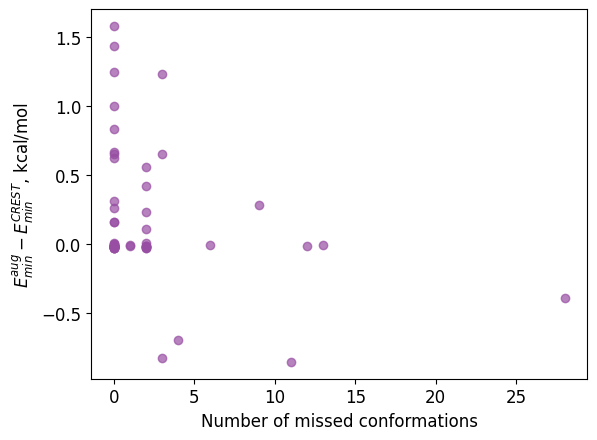

In [18]:
plt.scatter(
    [len(steps_to_keep[idx]) for idx in steps_to_keep.keys()],
    diffs,
    alpha=0.7,
    color='#984ea3'
)
plt.xlabel('Number of missed conformations')
plt.ylabel('$E_{min}^{aug} - E_{min}^{CREST}$, kcal/mol')

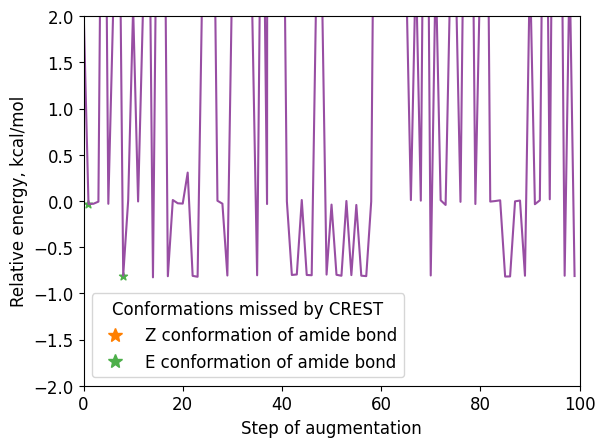

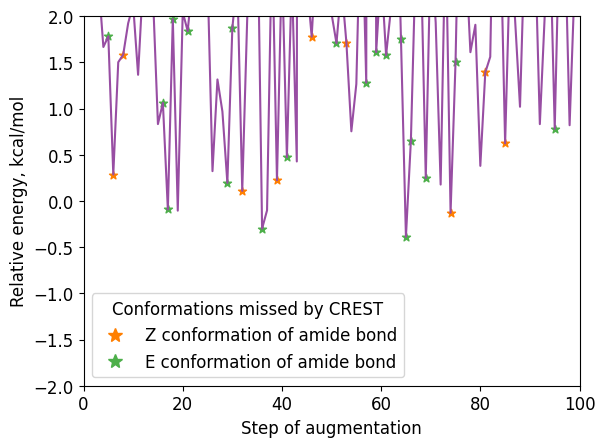

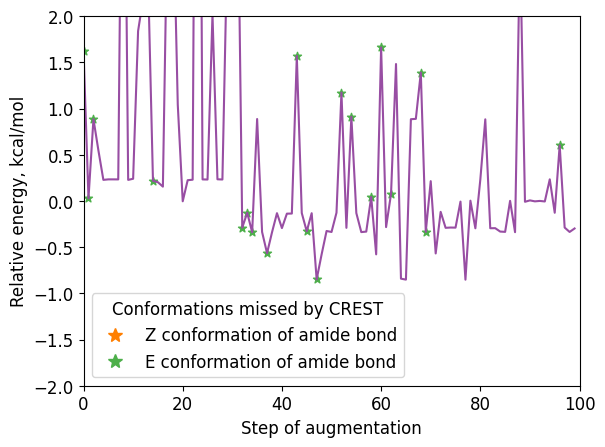

In [20]:
for cur in [1, 6, 35]:
    
    ens = np.asarray(en_logs[cur])
    ens -= crest_lowest_en[cur]
    ens /= KC2H

    plt.plot(ens, color='#984ea3')

    for step in steps_to_keep_all[cur]:
        p = Confpool()
        p.include_from_file(f'aug_res/mol_{cur}_refine_all_points_no_h.xyz')
        if cur == 35:
            z_conf = np.abs(p[step].z(10, 9, 8, 6)) < 30
        if cur == 6:
            z_conf = np.abs(p[step].z(3, 10, 2, 11)) < 30
        if cur == 1:
            z_conf = np.abs(p[step].z(18, 13, 12, 17)) < 30
        
        plt.scatter(
            x=step,
            y=ens[step],
            marker='*',
            c='#ff7f00' if z_conf else '#4daf4a',
        )

    cis =  mlines.Line2D([], [], color='#ff7f00', marker='*', linestyle='None',
                          markersize=10, label=r'Z conformation of amide bond')
    trans =  mlines.Line2D([], [], color='#4daf4a', marker='*', linestyle='None',
                          markersize=10, label=r'E conformation of amide bond')
    
    plt.ylim(-2, 2)
    plt.xlim(0, 100)
    plt.xlabel('Step of augmentation')
    plt.ylabel('Relative energy, kcal/mol')
    plt.legend(handles=[cis, trans], title='Conformations missed by CREST')
    plt.show()